In [1]:
# Exercises for Module 6 - API and Python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests

from config import weather_api_key

In [3]:
# Create 1500 random lat & long values
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats,lngs)
coordinates = list(lat_lngs)  # Creates a list of 1500 tuples
coordinates[:10]

[(-41.525699338124944, 34.648307312624524),
 (-79.9448528843292, -155.08995728386904),
 (44.29192842469351, -55.723405521834536),
 (-22.38090492886056, 64.19914312403671),
 (-79.65987352641471, -21.115314934103395),
 (-15.97536518937612, -65.27956583546501),
 (-13.229418116665826, 86.0879452174708),
 (-76.44984771867965, -54.01839285761045),
 (40.35422190974634, 62.956712511819916),
 (6.2909817638776815, 156.55051686777784)]

In [4]:
# Explore citipy function with a small sample
mini_sample = coordinates[:5]
mini_sample

[(-41.525699338124944, 34.648307312624524),
 (-79.9448528843292, -155.08995728386904),
 (44.29192842469351, -55.723405521834536),
 (-22.38090492886056, 64.19914312403671),
 (-79.65987352641471, -21.115314934103395)]

In [5]:
for coordinate in mini_sample:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


east london za
mataura pf
saint-pierre pm
grand river south east mu
ushuaia ar


In [6]:
# Create list for holding cities for the entire example
cities = []
# Find nearest city and add to cities list if new.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in cities:
        cities.append(city)

print(len(cities))

595


In [7]:
# Starting with the Open Weather API stuff (Section 6.2.3)
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?"
city_name = "Boston"
query_url = url + "q="+city_name + "&units=Imperial&APPID=" + weather_api_key



In [8]:
city_weather = requests.get(query_url).json()

In [9]:
city_weather.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [10]:
city_weather

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 79.92,
  'feels_like': 79.92,
  'temp_min': 74.46,
  'temp_max': 84.11,
  'pressure': 1022,
  'humidity': 37},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 258, 'gust': 11.01},
 'clouds': {'all': 75},
 'dt': 1622652662,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1622624978,
  'sunset': 1622679316},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
other_call = requests.get(query_url)  # response of 200 indicates the API call got a valid response
other_call.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 79.92,
  'feels_like': 79.92,
  'temp_min': 74.46,
  'temp_max': 84.11,
  'pressure': 1022,
  'humidity': 37},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 258, 'gust': 11.01},
 'clouds': {'all': 75},
 'dt': 1622652662,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1622624978,
  'sunset': 1622679316},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# practice retrieving pieces of the JSON data
city_weather.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [13]:
city_weather['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1622624978,
 'sunset': 1622679316}

In [14]:
city_weather['sys']['country']

'US'

In [15]:
city_weather['coord']

{'lon': -71.0598, 'lat': 42.3584}

In [16]:
city_weather['coord']['lat']

42.3584

In [17]:
city_weather['main']

{'temp': 79.92,
 'feels_like': 79.92,
 'temp_min': 74.46,
 'temp_max': 84.11,
 'pressure': 1022,
 'humidity': 37}

In [18]:
city_weather['main']['temp_max']

84.11

In [19]:
lat = city_weather["coord"]["lat"]
lng = city_weather["coord"]["lon"]
max_temp = city_weather["main"]["temp_max"]
humidity = city_weather["main"]["humidity"]
clouds = city_weather["clouds"]["all"]
wind = city_weather["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 84.11 37 75 3


In [20]:
# Convert UTC timestamp
from datetime import datetime


In [21]:
date = city_weather['dt']
date

1622652662

In [22]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-06-02 16:51:02'

In [23]:
# Section 6.2.6 - Exercises; continuing with API call for 500 cities
import time
import sys
city_data = []
url = "http://api.openweathermap.org/data/2.5/weather?"

print("------------------------")
print("beginning data retrieval")
print("------------------------")
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    time.sleep(1)
    # Group sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    city_url = url + "q="+ city.replace(" ","+") + "&units=Imperial&APPID=" + weather_api_key
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
    #Run an API request for each city
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({ 'City':city.title(),
                          'Lat': city_lat, 'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date })
    except:  # if an error, skip the city
        print("City not found. Skipping...")
        pass

print("---------------------")
print("Ending data retrieval")
print("---------------------")


------------------------
beginning data retrieval
------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | saint-pierre
Processing Record 4 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | chimore
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | gazli
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | lagoa
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | hinesville
Processing Record 14 of Set 1 | whitefish
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | rawson
Processing Record 17 of Set 1 | chernyshevskiy
Processing Record 18 of Set 1 | tamworth
Processing Record 19 of Set 1 | amderma
City not found. Skipping...
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | ma

Processing Record 37 of Set 4 | umm lajj
Processing Record 38 of Set 4 | hamilton
Processing Record 39 of Set 4 | nome
Processing Record 40 of Set 4 | xam nua
Processing Record 41 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 42 of Set 4 | manaure
Processing Record 43 of Set 4 | mar del plata
Processing Record 44 of Set 4 | kazachinskoye
Processing Record 45 of Set 4 | mahebourg
Processing Record 46 of Set 4 | te anau
Processing Record 47 of Set 4 | adrar
Processing Record 48 of Set 4 | napasar
Processing Record 49 of Set 4 | sal rei
Processing Record 50 of Set 4 | norcasia
Processing Record 1 of Set 5 | hami
Processing Record 2 of Set 5 | tame
Processing Record 3 of Set 5 | taltal
Processing Record 4 of Set 5 | avera
Processing Record 5 of Set 5 | saskylakh
Processing Record 6 of Set 5 | sinnamary
Processing Record 7 of Set 5 | haines junction
Processing Record 8 of Set 5 | shitanjing
Processing Record 9 of Set 5 | carnarvon
Processing Record 10 of Set 5 | lub

Processing Record 26 of Set 8 | deputatskiy
Processing Record 27 of Set 8 | san patricio
Processing Record 28 of Set 8 | tiksi
Processing Record 29 of Set 8 | mizdah
Processing Record 30 of Set 8 | nieuw amsterdam
Processing Record 31 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 32 of Set 8 | buenos aires
Processing Record 33 of Set 8 | saldanha
Processing Record 34 of Set 8 | bubaque
Processing Record 35 of Set 8 | chinchina
Processing Record 36 of Set 8 | aksarka
Processing Record 37 of Set 8 | kedougou
Processing Record 38 of Set 8 | maceio
Processing Record 39 of Set 8 | camacha
Processing Record 40 of Set 8 | amahai
Processing Record 41 of Set 8 | kosonsoy
Processing Record 42 of Set 8 | asmar
Processing Record 43 of Set 8 | kurumkan
Processing Record 44 of Set 8 | lixourion
Processing Record 45 of Set 8 | nishihara
Processing Record 46 of Set 8 | lahaina
Processing Record 47 of Set 8 | gossaigaon
Processing Record 48 of Set 8 | shelopugino
Processing Record 4

Processing Record 17 of Set 12 | wageningen
Processing Record 18 of Set 12 | mpulungu
Processing Record 19 of Set 12 | viedma
Processing Record 20 of Set 12 | boali
Processing Record 21 of Set 12 | bay roberts
Processing Record 22 of Set 12 | kyra
Processing Record 23 of Set 12 | kannur
Processing Record 24 of Set 12 | bilma
Processing Record 25 of Set 12 | nuuk
Processing Record 26 of Set 12 | oga
Processing Record 27 of Set 12 | benito juarez
Processing Record 28 of Set 12 | waingapu
Processing Record 29 of Set 12 | grand gaube
Processing Record 30 of Set 12 | pio xii
Processing Record 31 of Set 12 | banjar
Processing Record 32 of Set 12 | chlorakas
Processing Record 33 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 34 of Set 12 | vila franca do campo
Processing Record 35 of Set 12 | tocopilla
Processing Record 36 of Set 12 | talnakh
Processing Record 37 of Set 12 | quepos
Processing Record 38 of Set 12 | marfino
Processing Record 39 of Set 12 | vangaindrano
Proc

In [24]:
# Section 6.2.7 - Create a df from the city_weather data
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,61.74,88,20,11.50,ZA,2021-06-02 16:55:55
1,Mataura,-46.1927,168.8643,40.41,97,18,3.42,NZ,2021-06-02 16:55:57
2,Saint-Pierre,-21.3393,55.4781,74.88,80,0,12.66,RE,2021-06-02 16:51:02
3,Ushuaia,-54.8000,-68.3000,33.42,93,75,4.61,AR,2021-06-02 16:54:47
4,Chimore,-16.9833,-65.1333,84.07,54,92,4.29,BO,2021-06-02 16:56:02
5,Hithadhoo,-0.6000,73.0833,83.73,68,71,18.05,MV,2021-06-02 16:56:03
6,Gazli,40.1333,63.4500,96.44,13,2,14.58,UZ,2021-06-02 16:56:04
7,Kavieng,-2.5744,150.7967,80.82,82,96,9.71,PG,2021-06-02 16:56:06
8,Lagoa,39.0500,-27.9833,59.27,58,83,5.06,PT,2021-06-02 16:56:07
9,Kaitangata,-46.2817,169.8464,42.10,92,13,6.31,NZ,2021-06-02 16:56:09


In [25]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

# Create and export output fil
city_data_df.to_csv("weather_data/cities.csv", index_label="City_ID")

In [26]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2021-06-02 16:55:55,-33.0153,27.9116,61.74,88,20,11.50
1,Mataura,NZ,2021-06-02 16:55:57,-46.1927,168.8643,40.41,97,18,3.42
2,Saint-Pierre,RE,2021-06-02 16:51:02,-21.3393,55.4781,74.88,80,0,12.66
3,Ushuaia,AR,2021-06-02 16:54:47,-54.8000,-68.3000,33.42,93,75,4.61
4,Chimore,BO,2021-06-02 16:56:02,-16.9833,-65.1333,84.07,54,92,4.29
5,Hithadhoo,MV,2021-06-02 16:56:03,-0.6000,73.0833,83.73,68,71,18.05
6,Gazli,UZ,2021-06-02 16:56:04,40.1333,63.4500,96.44,13,2,14.58
7,Kavieng,PG,2021-06-02 16:56:06,-2.5744,150.7967,80.82,82,96,9.71
8,Lagoa,PT,2021-06-02 16:56:07,39.0500,-27.9833,59.27,58,83,5.06
9,Kaitangata,NZ,2021-06-02 16:56:09,-46.2817,169.8464,42.10,92,13,6.31


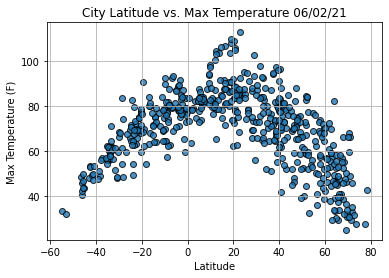

In [27]:
# Section 6.3.1 to 6.3.4 - Plot Weather Data
import time

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1_LatvsMaxTemp.png")

# Show plot.
plt.show()

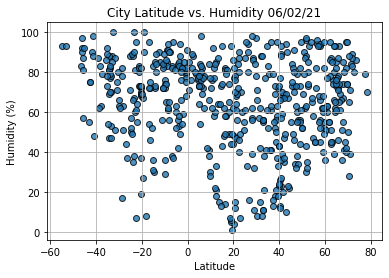

In [28]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2_LatvsHumidity.png")

# Show plot.
plt.show()

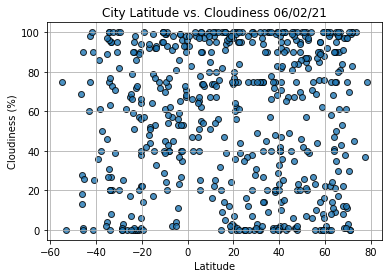

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3_LatvsCloudiness.png")
# Show plot.
plt.show()

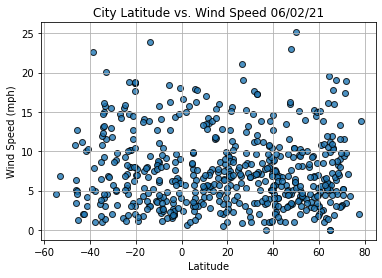

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4_LatvsWindSpeed.png")
# Show plot.
plt.show()

In [41]:
# Sections 6.4.1 to 6.4.5 - Regression and Correlations with variables
from scipy.stats import linregress

# Create a function to do lin reg on weather data & plot line & data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

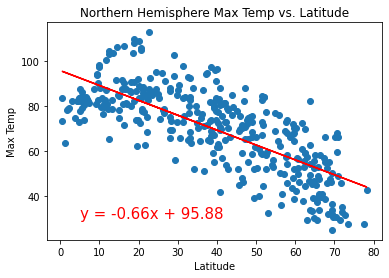

In [55]:
# Call regression function for each scatterplot for Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 'Northern Hemisphere Max Temp vs. Latitude', 'Max Temp', (5,30))


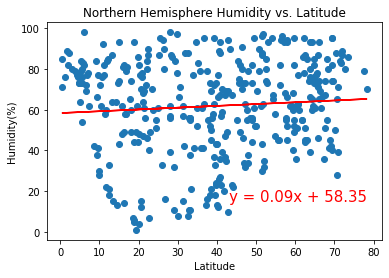

In [56]:
y_values=northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 'Northern Hemisphere Humidity vs. Latitude', 'Humidity(%)', (43,15))


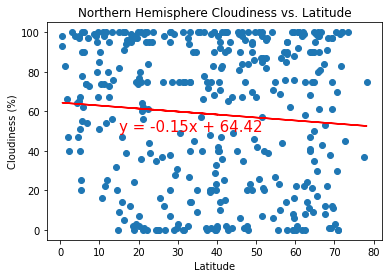

In [57]:
y_values=northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 'Northern Hemisphere Cloudiness vs. Latitude', 'Cloudiness (%)', (15,50))


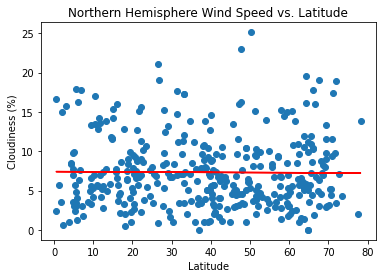

In [58]:
y_values=northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 'Northern Hemisphere Wind Speed vs. Latitude', 'Cloudiness (%)', (15,50))


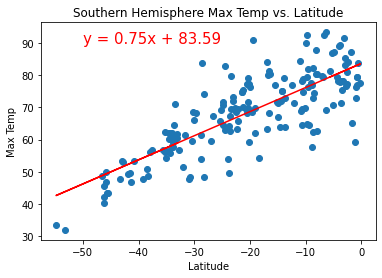

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 'Southern Hemisphere Max Temp vs. Latitude', 'Max Temp',(-50,90))

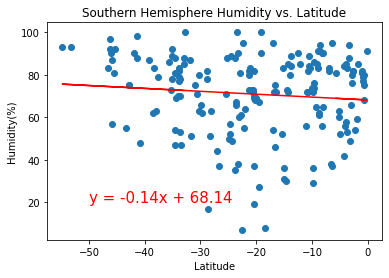

In [64]:
y_values=southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 'Southern Hemisphere Humidity vs. Latitude', 'Humidity(%)', (-50,20))


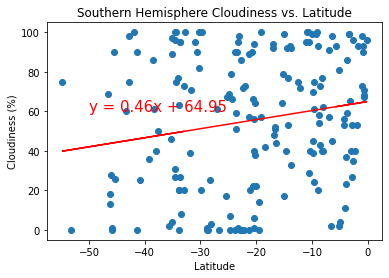

In [65]:
y_values=southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 'Southern Hemisphere Cloudiness vs. Latitude', 'Cloudiness (%)', (-50,60))

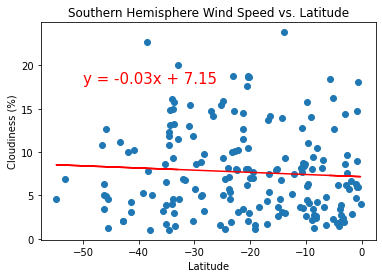

In [66]:
y_values=southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 'Southern Hemisphere Wind Speed vs. Latitude', 'Cloudiness (%)', (-50,18))